In [101]:
import pandas as pd

df = pd.read_csv("data/player_stats.csv")
df[df["yearID"] == 2020].head()
df = df[df["leagueID"] == "NL"]
df = df[["playerID", "br_WAR_total", "salary"]]
# get rows where no column has NaN
df = df.dropna()
# keep unique playerID and keep the first if duplicates are found
df = df.drop_duplicates(subset="playerID", keep="first")

In [126]:
df

,playerID,br_WAR_total,salary
15743,tudorjo01,8.24,457500.0
1225,brownke01,7.77,3350000.0
6849,sheetbe01,7.32,2425000.0
33,schmija01,7.00,7937500.0
509,arroybr01,6.97,3000000.0
...,...,...,...
11866,jacksed01,-2.13,11000000.0
3080,zitoba01,-2.46,20000000.0
11926,cabrejo01,-2.56,705000.0
9523,clancji01,-2.88,1225000.0


In [157]:
# sort by ascending salary
df = df.sort_values(by="br_WAR_total", ascending=False)
df = df.reset_index()
df = df.drop(columns="index")

In [158]:
df

,level_0,playerID,br_WAR_total,salary
0,0,tudorjo01,8.24,457500.0
1,1,brownke01,7.77,3350000.0
2,2,sheetbe01,7.32,2425000.0
3,3,schmija01,7.00,7937500.0
4,4,arroybr01,6.97,3000000.0
...,...,...,...,...
1621,1621,jacksed01,-2.13,11000000.0
1622,1622,zitoba01,-2.46,20000000.0
1623,1623,cabrejo01,-2.56,705000.0
1624,1624,clancji01,-2.88,1225000.0


In [186]:
from numpy.random import choice
normalized = df["br_WAR_total"] + abs(min(df["br_WAR_total"]))
draw = choice(list(range(len(df))), 25,
              p=normalized/sum(normalized), replace=False)
draw

array([  95, 1232, 1347,   49,  183,  579, 1315, 1390, 1166,  299,   84,
        900,  533,  323, 1382,   54,  408,   48, 1616,  557,  978,  680,
        338,  369, 1143])

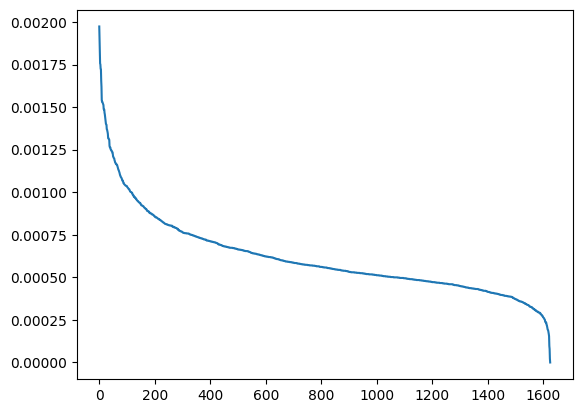

In [170]:
#plot series
import matplotlib.pyplot as plt
plt.plot(normalized/sum(normalized))


0.4958671586715867 1.361786465793056


(array([0.00546672, 0.00546672, 0.        , 0.00546672, 0.00546672,
        0.        , 0.        , 0.00546672, 0.01093344, 0.01640016,
        0.01093344, 0.02733361, 0.02733361, 0.04373377, 0.0765341 ,
        0.09293426, 0.09293426, 0.12573459, 0.1530682 , 0.23506902,
        0.28973623, 0.28973623, 0.32253656, 0.51933853, 0.48107148,
        0.58493918, 0.53573869, 0.38267049, 0.43733771, 0.39360394,
        0.24600246, 0.30066967, 0.21866885, 0.28426951, 0.26786935,
        0.17493508, 0.22413557, 0.1804018 , 0.19133525, 0.10933443,
        0.16946836, 0.10933443, 0.08746754, 0.10386771, 0.0765341 ,
        0.07106738, 0.07106738, 0.06013393, 0.06013393, 0.04373377,
        0.05466721, 0.04373377, 0.06560066, 0.02733361, 0.03280033,
        0.02733361, 0.02186689, 0.02186689, 0.02733361, 0.02733361,
        0.02733361, 0.01640016, 0.02186689, 0.02186689, 0.02186689,
        0.        , 0.02733361, 0.00546672, 0.01093344, 0.01093344,
        0.01093344, 0.01093344, 0.00546672, 0.01

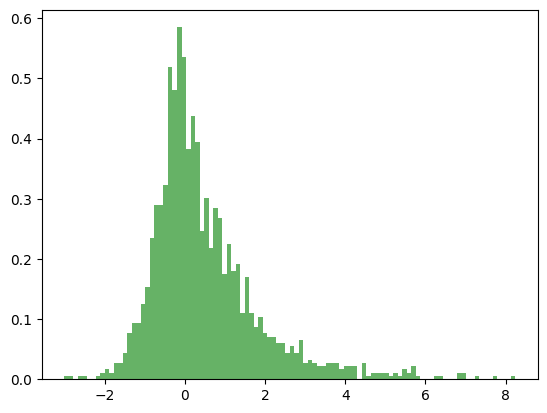

In [125]:
# fit normal distribution to data
from scipy.stats import norm
import numpy as np
mu, std = norm.fit(df["br_WAR_total"])
print(mu, std)

# plot the norm ontop of the histogram
import matplotlib.pyplot as plt

plt.hist(df["br_WAR_total"], bins=100, density=True, alpha=0.6, color="g")


In [201]:
# randomly sample from df 1000 times taking 25 values each time
# and calculate the mean of each sample

#sort df by descending war_score
df = df.sort_values(by="br_WAR_total", ascending=False)


SAMPLE_SIZE = 10000
BUDGET = 50000000
max_war = 0
# set min salary to max int

for i in range(SAMPLE_SIZE):
    sample = df.sample(n=25, replace=False, weights="br_WAR_total")

    if sum(sample["br_WAR_total"]) > max_war and sum(sample["salary"]) <= BUDGET:
        max_war = sum(sample["br_WAR_total"])

print(f"Max WAR: {max_war}")



SyntaxError: invalid syntax (989466651.py, line 14)

In [215]:
# do the same as above but sample using an exponential distribution
# and calculate the mean of each sample

#sort df by descending war_score
def sample_uniform(df, sample_size, budget):
    df1 = df.sort_values(by="br_WAR_total", ascending=False)

    SAMPLE_SIZE = sample_size
    BUDGET = budget
    max_war = 0
    # set min salary to max int

    for i in range(SAMPLE_SIZE):
        sample = df1.sample(n=25, replace=False)

        if sum(sample["br_WAR_total"]) > max_war and sum(sample["salary"]) <= BUDGET:
            max_war = sum(sample["br_WAR_total"])

    return max_war

In [232]:
# USING OVERSAMPLING
#sort df by descending war_score

def sample_over(df, sample_size, budget):
    df1 = df.sort_values(by="br_WAR_total", ascending=False)

    SAMPLE_SIZE = sample_size
    BUDGET = budget
    max_war = 0
    # set min salary to max int
    normalized = df1["br_WAR_total"] + abs(min(df1["br_WAR_total"]))
    for i in range(SAMPLE_SIZE):
        sample = choice(list(range(len(df1))), 25, p=normalized/sum(normalized), replace=False)

        if sum(df1.iloc[sample]["br_WAR_total"]) > max_war and sum(df1.iloc[sample]["salary"]) <= BUDGET:
            max_war = sum(df1.iloc[sample]["br_WAR_total"])

    return max_war

In [225]:
def sample_multistage(df, sample_size, budget, frac=0.2):
    df1 = df.sort_values(by="br_WAR_total", ascending=True)
    df1 = df1.iloc[:int(len(df)*frac)]
    df1.sort_values(by="salary", ascending=False)
    df2 = df.iloc[:int(len(df)*frac)]
    return sample_uniform(df2, sample_size, budget)

In [234]:
def sample_multistage_oversample(df, sample_size, budget, frac=0.2):
    df1 = df.sort_values(by="br_WAR_total", ascending=True)
    df1 = df1.iloc[:int(len(df)*frac)]
    df1.sort_values(by="salary", ascending=False)
    df2 = df.iloc[:int(len(df)*frac)]
    return sample_over(df2, sample_size, budget)

In [238]:
BUDGET = 50000000
SAMPLE_SIZE = 10000

print("Uniform: ", sample_uniform(df, SAMPLE_SIZE, BUDGET))
print("Oversample: ",sample_over(df, SAMPLE_SIZE, BUDGET))
print("Multistage: ", sample_multistage(df, SAMPLE_SIZE, BUDGET))
print("Oversampled Multistage: ", sample_multistage_oversample(df, SAMPLE_SIZE, BUDGET))

Uniform:  42.86000000000001
Oversample:  58.660000000000004
Multistage:  89.78999999999999
Oversampled Multistage:  99.71
